<p style="font-family: Arial; font-size:3.75em;color:black; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [2]:
ser = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 100 , 'nancy', 'dan', 'eric'])
ser

tom      100
100      200
nancy    300
dan      400
eric     500
dtype: int64

In [3]:
ser

tom      100
100      200
nancy    300
dan      400
eric     500
dtype: int64

In [4]:
ser.index

Index(['tom', 100, 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser['nancy']

300

In [6]:
ser[[4, 3, 1]]

eric    500
dan     400
100     200
dtype: int64

In [7]:
ser.iloc[3]

400

In [8]:
'bob' in ser

False

In [9]:
ser

tom      100
100      200
nancy    300
dan      400
eric     500
dtype: int64

In [10]:
ser * 2

tom       200
100       400
nancy     600
dan       800
eric     1000
dtype: int64

In [11]:
ser ** 2

tom       10000
100       40000
nancy     90000
dan      160000
eric     250000
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [12]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [13]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

In [16]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [17]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [18]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [19]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [20]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [21]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [22]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [23]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [25]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [26]:
three = df.pop('three')

In [26]:
three

NameError: name 'three' is not defined

In [27]:
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [29]:
del df['two']

In [30]:
del df['flag']

In [28]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,two,copy_of_one,three,flag
apple,100.0,111.0,100.0,11100.0,False
ball,200.0,222.0,200.0,44400.0,False
cerill,NaN,333.0,NaN,NaN,False
clock,300.0,NaN,300.0,NaN,True
dancy,NaN,4444.0,NaN,NaN,False


In [37]:
df['one_upper_half'] = df['two'][:3]
df

,one,two,copy_of_one,three,flag,one_upper_half
apple,100.0,111.0,100.0,11100.0,False,111.0
ball,200.0,222.0,200.0,44400.0,False,222.0
cerill,NaN,333.0,NaN,NaN,False,333.0
clock,300.0,NaN,300.0,NaN,True,NaN
dancy,NaN,4444.0,NaN,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

### Please note that **you will need to download the dataset**. 

Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called **movielens** in your **Week-4-pandas** folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [2]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

Icon_
README.txt
genome-scores.csv
genome-tags.csv
links.csv
ml-20m
movies.csv
ratings.csv
tags.csv


In [31]:
!cat ./movielens/movies.csv | wc -l

27279


In [33]:
!grep "story" ./movielens/movies.csv | wc -l

29


In [31]:
!head -5 ./movielens/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [34]:
!head -5 ./movielens/tags.csv

userId,movieId,tag,timestamp
18,4141,Mark Waters,1240597180
65,208,dark hero,1368150078
65,353,dark hero,1368150079
65,521,noir thriller,1368149983


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [3]:
import pandas as pd
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
animated=movies['genres'].str.contains('Animation')
movies[animated]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [ ]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()


In [3]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [42]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [52]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [53]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [54]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [55]:
row_0['userId']

18

In [56]:
'userId' in row_0

True

In [57]:
row_0.name

0

In [58]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [59]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [60]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [49]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [50]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [4]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [52]:
ratings['rating'].sum()

70511498.5

In [ ]:
ratings['rating'].mean()

In [55]:
ratings['rating'].max()

5.0

In [56]:
ratings['rating'].std()

1.051988919275684

In [57]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [58]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [59]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [60]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [61]:
movies.shape

(27278, 3)

In [62]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

That's nice! No NULL values!

In [63]:
ratings.shape

(20000263, 3)

In [64]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

That's nice! No NULL values!

In [65]:
tags.shape

(465564, 3)

In [66]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [67]:
tags = tags.dropna()

In [68]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [69]:
tags.shape

(465548, 3)

In [70]:
df.ftypes

one               float64:dense
two               float64:dense
copy_of_one       float64:dense
flag                 bool:dense
one_upper_half    float64:dense
dtype: object

That's nice! No NULL values! Notice the number of lines have decreased.

In [71]:
df.memory_usage(['dancy'])


Index             200
one                40
two                40
copy_of_one        40
flag                5
one_upper_half     40
dtype: int64

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028DA612D860>]],
      dtype=object)

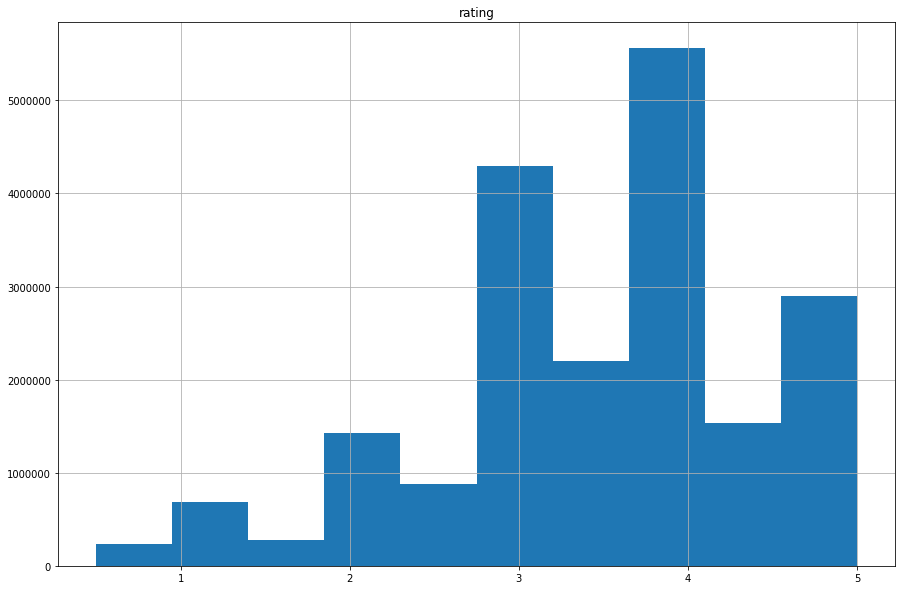

In [72]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [87]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


AttributeError: 'Line2D' object has no property 'row'

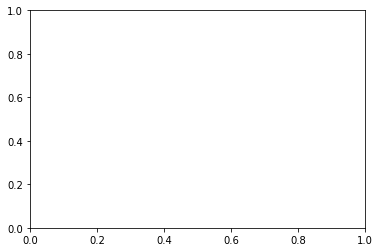

In [89]:
ratings.plot(row='movieId', column='rating')

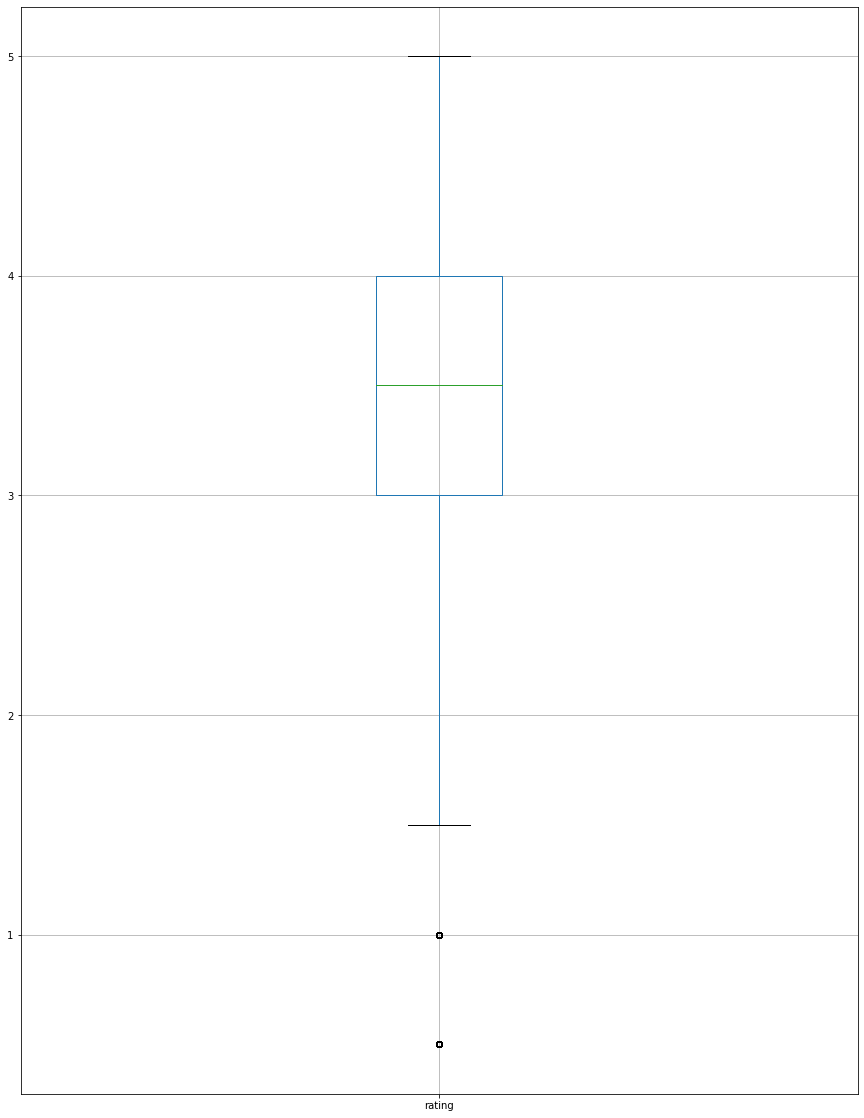

In [73]:
ratings.boxplot(column='rating',figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [74]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [75]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [76]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [77]:
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [78]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [80]:
tags.head(10)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
5,65,668,bollywood
6,65,898,screwball comedy
7,65,1248,noir thriller
8,65,1391,mars
9,65,1617,neo-noir


In [81]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

howard cosell          1
Roy Dupuis             1
drew                   1
neglected family       1
so long! and wierd!    1
Kenji Miyazawa         1
annoying kids          1
disconnected           1
rite of passage        1
ignores psychology     1
Name: tag, dtype: int64

In [46]:
tag_counts[:20].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [47]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

,userId,movieId,rating,timestamp
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000261,138493,70286,5.0,1258126944


In [83]:
is_animation = movies['genres'].str.contains('Animation')
l=10

movies[is_animation]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [84]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


In [50]:
ratings[239125:239130]

,userId,movieId,rating,timestamp
239125,1652,367,3.0,1009000405
239126,1652,435,1.0,1008790062
239127,1652,541,5.0,1008790848
239128,1652,913,4.0,1008790945
239129,1652,923,5.0,1009420716


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [33]:
ratings_count = ratings[['movieId','rating']].groupby('rating').mean()
ratings_count

NameError: name 'ratings' is not defined

In [52]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [53]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [54]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [55]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [56]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [57]:
merge=[movies, tags]
result=pd.concat(merge, axis=1, join='inner')


In [58]:
result.head()

,movieId,title,genres,userId,movieId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,4141,Mark Waters,1240597180
1,2,Jumanji (1995),Adventure|Children|Fantasy,65,208,dark hero,1368150078
2,3,Grumpier Old Men (1995),Comedy|Romance,65,353,dark hero,1368150079
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,65,521,noir thriller,1368149983
4,5,Father of the Bride Part II (1995),Comedy,65,592,dark hero,1368150078


In [59]:
result2=movies.append(tags, sort=False)

In [60]:
result2.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN


In [61]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<h1 style="font-size:2em;color:#2467C0">


Combine aggregation, merging, and filters to get useful analytics
</h1>

In [62]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
avg_ratings.head()

,movieId,userId,rating
0,1,69282.396821,3.921240
1,2,69169.928202,3.211977
2,3,69072.079388,3.151040
3,4,69652.913280,2.861393
4,5,69113.475454,3.064592


In [64]:
del avg_ratings['userId']

In [65]:
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [66]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592


In [67]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][:10]

,movieId,title,genres,rating
27,28,Persuasion (1995),Drama|Romance,4.057546
46,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,4.053493
49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.334372
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
108,110,Braveheart (1995),Action|Drama|War,4.042534
109,111,Taxi Driver (1976),Crime|Drama|Thriller,4.110576
160,162,Crumb (1994),Documentary,4.009925
211,213,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama,4.038462
212,214,Before the Rain (Pred dozhdot) (1994),Drama|War,4.047240
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610


In [68]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [69]:
is_animated=box_office['genres'].str.contains('Animation')


In [70]:
box_office[is_comedy & is_animated & is_highly_rated][:10]

,movieId,title,genres,rating
708,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy,4.109473
732,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,4.167315
1125,1148,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime,4.181068
1197,1223,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi,4.066765
3340,3429,Creature Comforts (1989),Animation|Comedy,4.120696
13030,62336,FLCL (2000),Animation|Comedy|Fantasy|Sci-Fi,4.006627
15381,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,4.012974
19413,96608,Runaway Brain (1995),Animation|Comedy|Sci-Fi,4.142857
19710,97789,Step Up Love Story (Futari ecchi) (2002),Animation|Comedy|Romance,4.750000
24069,114931,Benigni (2009),Animation|Comedy|Drama,4.500000


In [71]:
box_office[is_comedy & is_highly_rated ][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [73]:
year_interval=year[[0,'title_year']].groupby('title_year').count()

NameError: name 'year' is not defined

In [67]:
year_interval.tail()

,0
title_year,
97,1
976,2
98,1
99,5
999,1


In [74]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


In [68]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<h1 style="font-family: Arial; font-size:1.35em;color:#2467C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </h1>

In [76]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [77]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [78]:
movie_genres.isnull().any()

0    False
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

<h1 style="font-family: Arial; font-size:1.35em;color:#2467C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </h1>

In [78]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [89]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [79]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [93]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [80]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [81]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [82]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [96]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [84]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [98]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [86]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [90]:
selected_rows.head()

,userId,movieId,tag,timestamp,parsed_time
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [89]:
tags.sort_values(by='parsed_time', ascending=False)[:10]

,userId,movieId,tag,timestamp,parsed_time
339178,102853,115149,russian mafia,1427771352,2015-03-31 03:09:12
158780,46072,6058,premonition,1427760764,2015-03-31 00:12:44
158763,46072,3409,premonition,1427760726,2015-03-31 00:12:06
288375,87797,215,Vienna,1427755801,2015-03-30 22:50:01
290535,88044,106782,profanity,1427754096,2015-03-30 22:21:36
290527,88044,106782,crime,1427753921,2015-03-30 22:18:41
290526,88044,106782,Amoral,1427753913,2015-03-30 22:18:33
290531,88044,106782,Jonah Hill,1427753849,2015-03-30 22:17:29
290530,88044,106782,inaccurate,1427753806,2015-03-30 22:16:46
290528,88044,106782,Economically Illiterate Writers,1427753739,2015-03-30 22:15:39


<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie Ratings related to the Year of Launch?

In [107]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [106]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()


,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [108]:
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [109]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


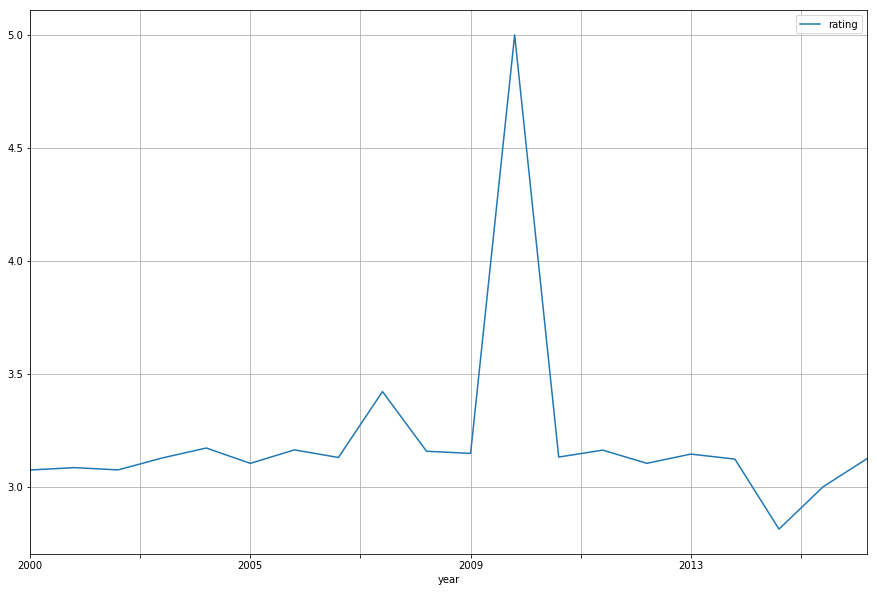

In [112]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the box office movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>